In [ ]:
pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae, mse

In [ ]:
Y_df = pd.read_csv('/content/last_df_y.csv')
Y_df.drop("Unnamed: 0",axis=1,inplace=True)

## Horizon 96

In [ ]:
Y_train_df = Y_df.iloc[:52599,:]
Y_test_df = Y_df.iloc[52599:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)


In [ ]:
horizon = 96
model = NHITS(h=horizon, input_size=24,
               max_steps=500,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.5 M 
-----------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
10.053    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]

<Axes: xlabel='ds'>

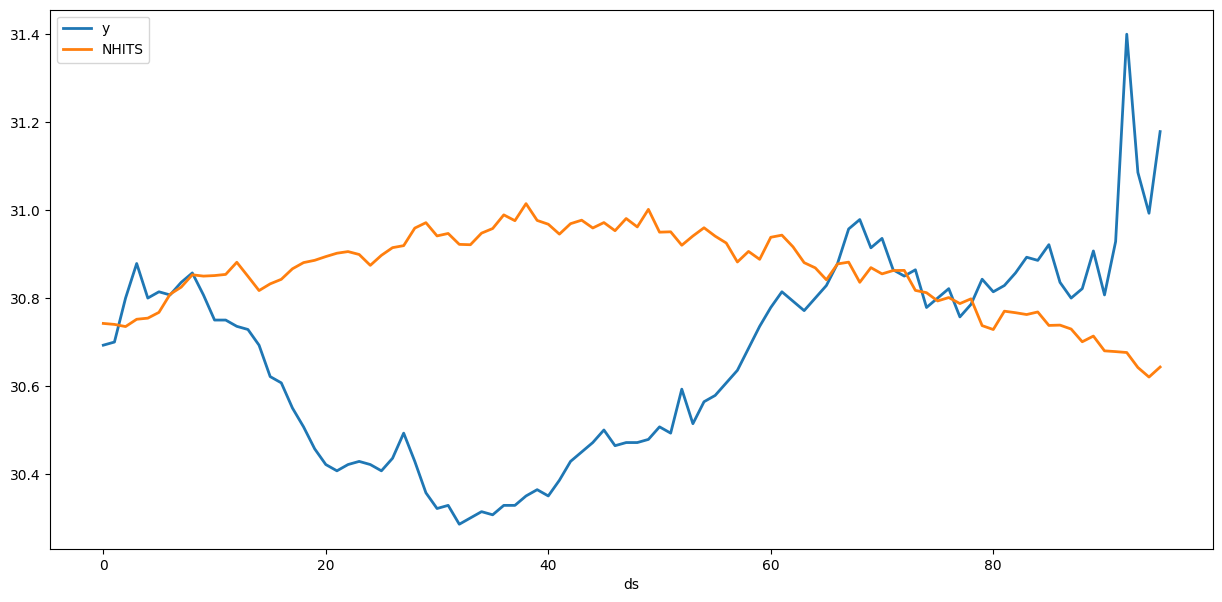

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[['NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')


In [ ]:

mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'N-Hits MAE: {mae_nhits}')
print(f'N-Hits MSE: {mse_nhits}')

N-Hits MAE: 0.28396067619323745
N-Hits MSE: 0.1309937779239211


## Horizon 192

In [ ]:
Y_train_df = Y_df.iloc[:52503,:]
Y_test_df = Y_df.iloc[52503:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)


In [ ]:
horizon = 192
model = NHITS(h=horizon, input_size=24,
               max_steps=500,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.6 M 
-----------------------------------------------
2.6 M     Trainable params
0         Non-trainable params
2.6 M     Total params
10.397    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]


<Axes: xlabel='ds'>

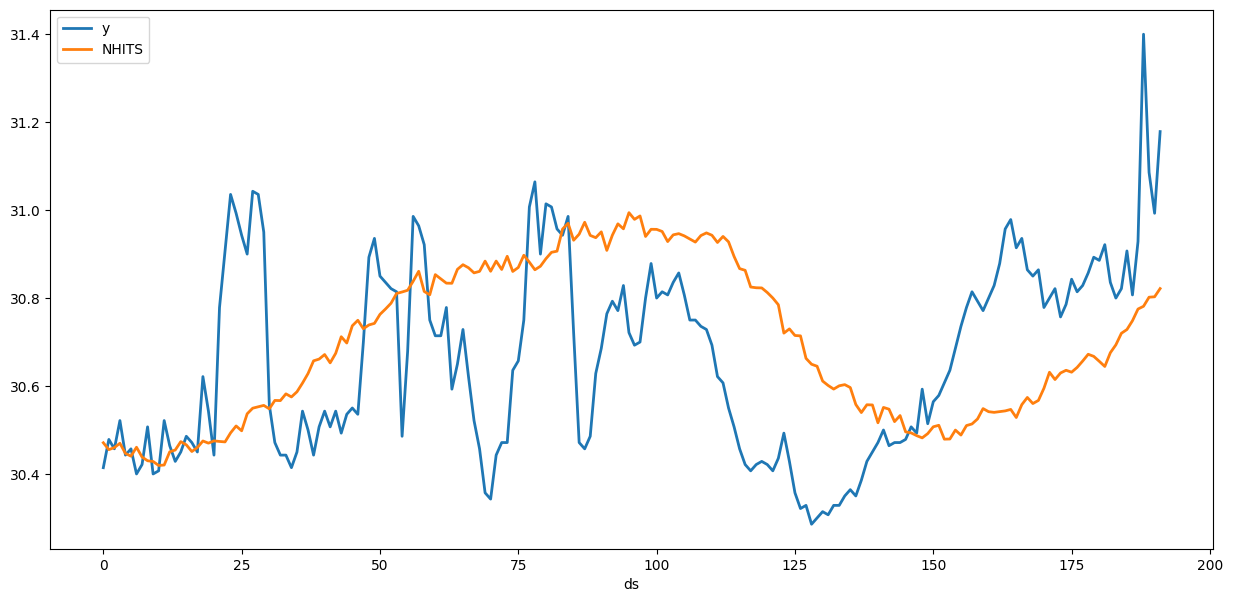

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')

In [ ]:
mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'N-Hits MAE: {mae_nhits}')
print(f'N-Hits MSE: {mse_nhits}')

N-Hits MAE: 0.20396535226276966
N-Hits MSE: 0.06122823288658161


## Horizon 336

In [ ]:
Y_train_df = Y_df.iloc[:52359,:]
Y_test_df = Y_df.iloc[52359:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)


In [ ]:
horizon = 336
model = NHITS(h=horizon, input_size=24,
               max_steps=500,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.7 M 
-----------------------------------------------
2.7 M     Trainable params
0         Non-trainable params
2.7 M     Total params
10.914    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]

<Axes: xlabel='ds'>

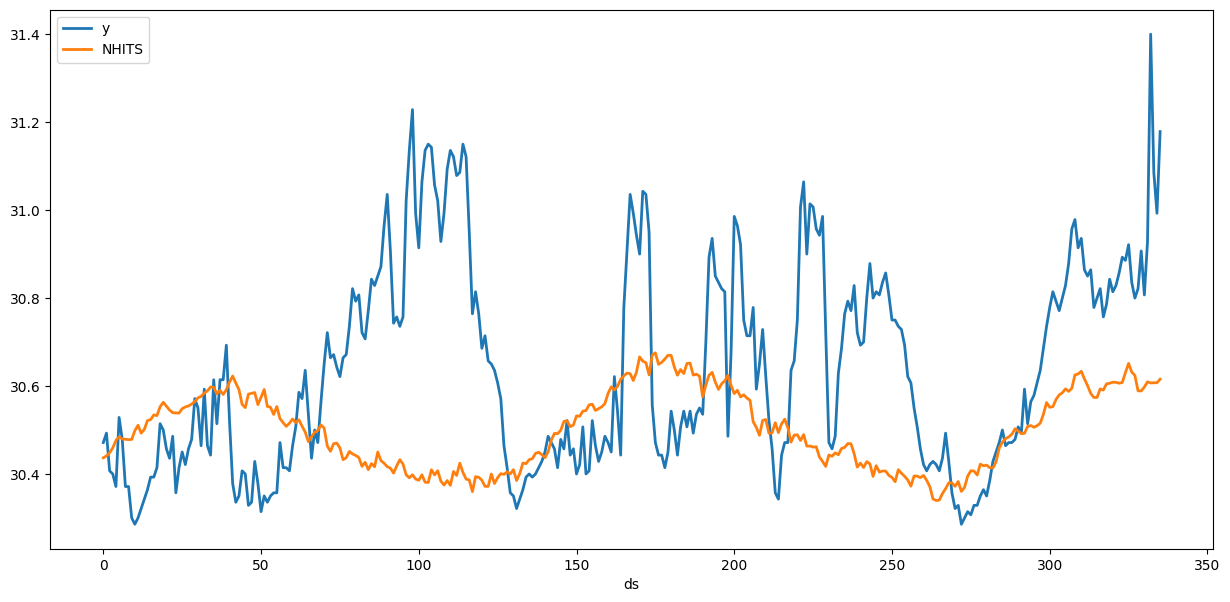

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')


In [ ]:
mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'Nhits MAE: {mae_nhits:.5f}')
print(f'Nhits MSE: {mse_nhits:.5f}')

Nhits MAE: 0.21527
Nhits MSE: 0.07981


## Horizon 720

In [ ]:
Y_train_df = Y_df.iloc[:51975,:]
Y_test_df = Y_df.iloc[51975:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)


In [ ]:
horizon = 720
model = NHITS(h=horizon, input_size=24,
               max_steps=500,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 3.1 M 
-----------------------------------------------
3.1 M     Trainable params
0         Non-trainable params
3.1 M     Total params
12.293    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]


<Axes: xlabel='ds'>

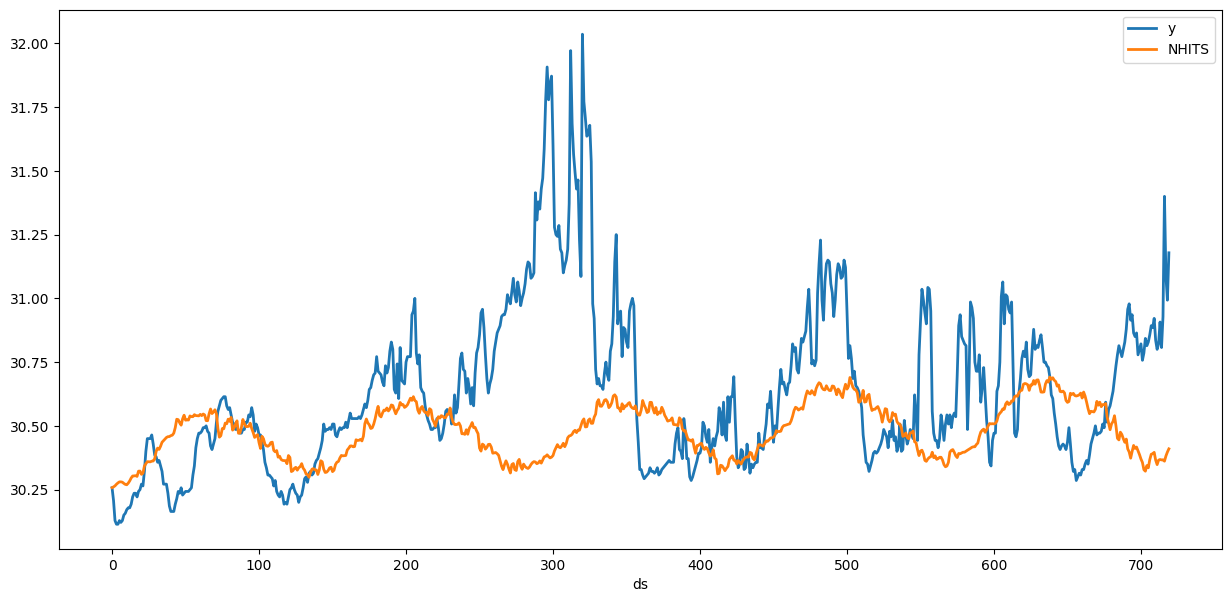

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')


In [ ]:
mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'Nhits MAE: {mae_nhits:}')
print(f'Nhits MSE: {mse_nhits:}')

Nhits MAE: 0.2461070972775656
Nhits MSE: 0.13098039620777208
